In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"D:\Dataset\flowers\Training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"D:\Dataset\flowers\Testing",target_size=(64,64),batch_size=32,class_mode = "categorical")

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)

C:\Users\S.V.D.H.E.N.P\AppData\Local\Temp\ipykernel_91844\3505885595.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)


Epoch 1/25
39/39 [==============================] - 41s 772ms/step - loss: 1.4446 - accuracy: 0.3438 - val_loss: 1.4007 - val_accuracy: 0.4125
Epoch 2/25
39/39 [==============================] - 25s 649ms/step - loss: 1.2575 - accuracy: 0.4426 - val_loss: 1.2572 - val_accuracy: 0.4500
Epoch 3/25
39/39 [==============================] - 23s 582ms/step - loss: 1.2013 - accuracy: 0.4867 - val_loss: 1.1840 - val_accuracy: 0.5094
Epoch 4/25
39/39 [==============================] - 21s 527ms/step - loss: 1.0973 - accuracy: 0.5361 - val_loss: 1.2075 - val_accuracy: 0.4906
Epoch 5/25
39/39 [==============================] - 19s 491ms/step - loss: 1.0953 - accuracy: 0.5296 - val_loss: 1.0235 - val_accuracy: 0.5938
Epoch 6/25
39/39 [==============================] - 19s 481ms/step - loss: 1.0592 - accuracy: 0.5873 - val_loss: 1.0561 - val_accuracy: 0.5625
Epoch 7/25
39/39 [==============================] - 16s 416ms/step - loss: 1.0648 - accuracy: 0.5743 - val_loss: 1.2361 - val_accuracy: 0.5500

In [ ]:
model.save("Flowers.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np

In [ ]:
model = load_model("Flowers.h5")

In [ ]:
img = image.load_img(r"C:\Users\S.V.D.H.E.N.P\Pictures\Saved Pictures\Daisy.jpg",target_size=(64,64))

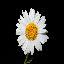

In [ ]:
img

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x = np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 467ms/step


In [ ]:
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id = pred_prob.argmax(axis = 1)[0]

In [ ]:
pred_id

0

In [ ]:
print("Predicted Flower is ",str(class_name[pred_id]))

Predicted Flower is  Daisy
